# Problem 1: Computing $\pi$ with Monte Carlo

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1.1 (generate random samples) 
def x_sample(N):
    rngx = np.random.default_rng()  # create a random number generator for x (non-deterministic)
    return rngx.uniform(-1, 1, size=N)  # generate N random x coordinates in [-1, 1] as an array
def y_sample(N):
    rngy = np.random.default_rng()  # create a random number generator for y (non-deterministic)
    return rngy.uniform(-1, 1, size=N)  # generate N random y coordinates in [-1, 1] as an array

#1.2 (estimate π using Monte Carlo method)
def estimate_pi(N):
    x = x_sample(N) 
    y = y_sample(N)
    inside_circle = (x**2 + y**2) <= 1 # squares each element of x and y, sums them pairwise, and checks if the result is <= 1
    return 4 * np.sum(inside_circle) / N # inside_circle is a boolean array, trues count as 1, falses as 0
N = int(input("Enter number of samples N: ")) # user input (integer) for number of samples
print(f"The estimate of π with {N} samples is π ~ {estimate_pi(N)}")

The estimate of π with 500 samples is π ~ 3.12


Text(0.5, 1.0, 'Mean Estimate of π vs Number of Samples')

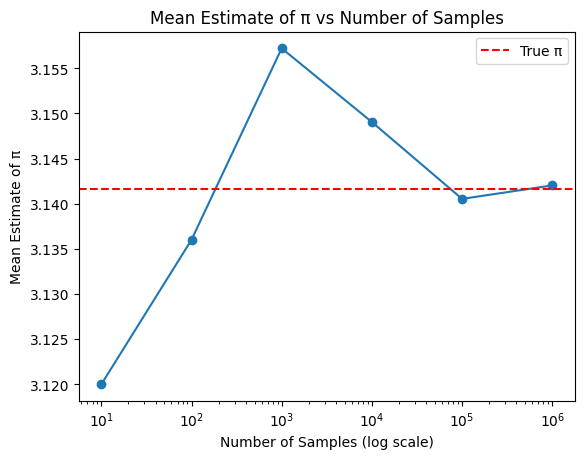

In [ ]:
#1.3 (plot mean estimate of π vs number of samples)
sample_arr = np.array([10, 100, 1000, 10000, 100000, 1000000]) # array of sample sizes
trials = 10 # number of trials for each sample size

def pi_estimate_arr(N, trials): # function to get array of pi estimates for given N and number of trials
    pi_list = [] 
    for i in range(trials): 
        pi_list.append(estimate_pi(N)) # append pi estimate to pi_list
    return np.array(pi_list) # convert list to numpy array and return it

pi_mean_list = []
for N in sample_arr: 
    pi_mean = np.mean(pi_estimate_arr(N, trials)) # calculate mean of pi estimates for current sample size
    pi_mean_list.append(pi_mean) # append mean to pi_mean_list
pi_mean_arr = np.array(pi_mean_list) # convert list of means to array

plt.plot(sample_arr, pi_mean_arr, '-o') # plot of mean estimates with points connected by lines
plt.xscale('log') # set x-axis to logarithmic scale
plt.yscale('linear') # set y-axis to linear scale
plt.axhline(y=np.pi, color='r', linestyle='--', label='True π') # horizontal line for true value of pi
plt.legend()
plt.xlabel('Number of Samples (log scale)')    
plt.ylabel('Mean Estimate of π')
plt.title('Mean Estimate of π vs Number of Samples')

In [ ]:
#1.3 (plot error bars using standard deviations)


    


# Problem 2: Computing $\pi$ the Old-Fashioned Way

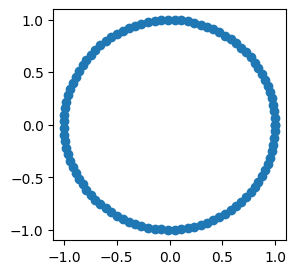

In [ ]:
#2.1 (generate evenly spaced points on unit circle)
def points_arrs(N):
    thetas = np.linspace(0,2*np.pi,num=N) # generate N evenly spaced angles from 0 to 2π 
    xs = np.cos(thetas) # x-coordinates on unit circle
    ys = np.sin(thetas) # y-coordinates on unit circle
    return xs, ys 
xs, ys = points_arrs(100) # example with 100 points
plt.figure(figsize=(3,3)) # set figure size to be square
plt.plot(xs, ys, 'o-') # plot and connect with lines

In [ ]:
#2.2 (compute distance between adjacent points)
def distance_arr(xs, ys):
    dx = np.diff(xs) # differences between adjacent x-coordinates, generated as array
    dy = np.diff(ys) # differences between adjacent y-coordinates, generated as array
    distances = np.sqrt(dx**2 + dy**2) # Euclidean distances between adjacent points, generated as array
    return distances

Text(0.5, 1.0, 'Estimate of π vs Number of Samples')

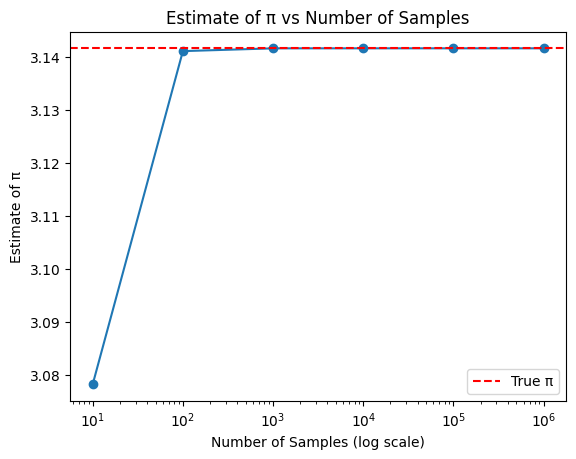

In [ ]:
#2.3 (plot estimate of π vs number of samples)
pi_estimate_list = []
sample_arr = np.array([10, 100, 1000, 10000, 100000, 1000000]) # array of sample sizes
for N in sample_arr: 
    xs, ys = points_arrs(N)
    pi_estimate = np.sum(distance_arr(xs,ys)) / 2 # estimate of pi using perimeter method
    pi_estimate_list.append(pi_estimate)  # append estimate to list
pi_estimate_arr = np.array(pi_estimate_list)  # convert list of estimates to array

plt.plot(sample_arr, pi_estimate_arr, '-o') # plot of estimates with points connected by lines
plt.xscale('log') # set x-axis to logarithmic scale
plt.yscale('linear') # set y-axis to linear scale
plt.axhline(y=np.pi, color='r', linestyle='--', label='True π') # horizontal line for true value of pi
plt.legend()
plt.xlabel('Number of Samples (log scale)')    
plt.ylabel('Estimate of π')
plt.title('Estimate of π vs Number of Samples')

In [ ]:
# Level-Up (O(1) algorithm)

# Problem 3: Primed for Computational Physics